In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 사전 학습된 AlexNet 불러오기
model = models.alexnet(pretrained=True)
model = model.to(device)
model.eval()  # 꼭 eval() 모드로 설정해야 합니다!

C:\Users\admin\anaconda3\envs\ai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\admin\anaconda3\envs\ai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# 사용할 이미지 경로
image_path = './dog.jpg'  # 테스트할 이미지 경로를 지정하세요

# 이미지 열기
image = Image.open(image_path)

# 전처리 (AlexNet용)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # 가운데 부분 224x224로 자르기
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet 기준 정규화
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0)  # 배치 차원 추가
input_tensor = input_tensor.to(device)

In [ ]:
# 추론
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

Predicted: Pomeranian


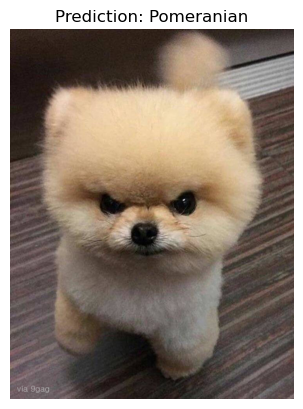

In [ ]:
# ImageNet 클래스 이름 가져오기
import json
import urllib.request

url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
filename = 'imagenet_classes.txt'
urllib.request.urlretrieve(url, filename)

# 클래스 이름 로드
with open(filename, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# 결과 출력
print(f'Predicted: {classes[predicted.item()]}')

# 이미지 시각화
plt.imshow(image)
plt.title(f'Prediction: {classes[predicted.item()]}')
plt.axis('off')
plt.show()